#  python数据挖掘与数据分析实战项目之谣言分类器

# 数据来源 爬虫 ---http://www.yaoyanbaike.com/

# python 使用os下的makedir函数

# 可以使用os包的mkdir函数来创建新的文件夹。

 # 
    import os 
    a = 'health'
    os.makedirs('e:py/谣言新闻/'+str(a))

    mkdir函数接受一个参数path指定新建文件夹的路径，示例代码如下：

    import os

    cur_dir = 'D:\curdir'
    folder_name = 'baiduzhidao'
    if os.path.isdir(cur_dir):
        os.mkdir(os.path.join(cur_dir, folder_name))
    为了确保已有的文件夹真实存在，示例代码中使用了os.path.isdir函数判断已有文件夹的路径是否正确。

    新的文件夹的路径可以由os.path.join函数，将已有文件夹的路径和新建文件夹文件名连接起来得到。由于Windows操作系统和Linux操作系统，路径的连接符不同，使用os.path.join连接能够确保同时在不同的操作系统中正常工作。

In [2]:
#使用request+bs4
import requests
# from lxml import etree
from bs4 import BeautifulSoup
import re
import os  
import threading
from time import *
# import 
headers = {
   'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64; rv:60.0) Gecko/20100101 Firefox/60.0'
    
    }
# content_xml = content.content.decode('utf-8')
# print(content.text)
# html = etree.HTML(content_xml)
# print(html)
#获取所有主页面全部链接
def all_news_info (new_type):#参数new_type为health_
        #翻页
    start_url_list = []
    for i in range(1,21):
#         start_urls = 'http://www.yaoyanbaike.com/category/'+str(new_type)+str(i)+'.html'
        if i ==1:     
            start_urls = ('http://www.yaoyanbaike.com/category/'+str(new_type)).replace('_','.html')
            print(start_urls)
            start_url_list.append(start_urls)
        if i>1:
            start_urls = 'http://www.yaoyanbaike.com/category/'+str(new_type)+str(i)+'.html'
            print(start_urls)
#             content = requests.get(start_urls,headers = headers)
#             soup = BeautifulSoup(content.text)
            start_url_list.append(start_urls)
    return start_url_list #返回所有分类页面，list格式
#获取每一页的全部文章链接
def get_news_url(start_url):
    content = requests.get(start_url,headers = headers)
    soup = BeautifulSoup(content.text,'html.parser')
    #find_all()方法返回的是一个列表
    new_url = soup.find_all('div',class_ = 'list-box m-t-n')
    news = []
    rule = '<a href="(.*?)" title=".*?">.*?</a>'
    new_all = re.findall(rule,str(list(new_url)[0]),re.I)
    for i in new_all:
        #获取新闻url，并补完整链接
        new_url = 'http://www.yaoyanbaike.com'+i
#         print(new_url)
        news.append(new_url)
#     print(news)
    return news #返回每个分类的全部全部文章链接，列表形式
def get_new_info(url,text_num,osdir_name):#获取一篇文章的详细内容
#     osdir_name = osdir_name[:-1]#去掉最后面的'_'字符
    content = requests.get(url,headers = headers)
    content.encoding='utf-8'#使用这个编码一般是可以的，防止出现乱码
    soup = BeautifulSoup(content.text,'html.parser')
    try:
         #记得使用Beautiful的find_all使用class查找的时候。由于class是内置类，不可以直接使用class,故class有一条下标的_记为class_
        #find()函数的返回一个元素,如果有多个，则返回第一个，使用find().get('属性名字')方法获取html元素中的标签如get('title')获取a元素中的title属性的值
        #find()函数一定要一层层的查找才可以找到，不可以跳过一层直接获取下两层的东西,要父-->子--->孙，不可父直接到孙
        new_title = soup.find('div',class_ = 'bg-white-only m-b wrapper').find('h1',class_='text-2x m-t-sm')#get_text()直接获取本标签的全部文本
        if new_title is None:
            pass
        else:
            new_title = new_title.get_text()
        #new_author = soup.find('div',class_ = 'bg-white-only m-b wrapper').find('div',class_='meta text-sm m-t').find('span',class_='m-r-sm text-success').get_text()
        #new_date = soup.find('div',class_ = 'bg-white-only m-b wrapper').find('div',class_='meta text-sm m-t').find('span',class_='text-muted time').get_text()
        new_content = soup.find('div',class_ = 'bg-white-only m-b wrapper').find('article',class_='content-text m-t-sm').get_text()
        article = new_content.replace(u'\n','')
    #     print(new_content.replace(u'\n',''))#去掉文章中所有换行符使用u''防止转义
    #     print(new_date[6:])
    #     print(new_author)
    #     print(new_title)
        #将文章写入txt文件中
        with open('e:py/谣言新闻/'+str(osdir_name)+'/'+str(text_num)+'.txt',mode='w', encoding='utf-8') as f:
            f.write(article)
            f.close()
            print('写好了一篇文章')
    except Exception as E:
        print('爬取错误！！！')
        raise #查看抛出的异常
#         print(E)
        print(url) 
#获取首页全部内容   
def get_index_info():
    start_url = 'http://www.yaoyanbaike.com/'
    content = requests.get(start_url,headers = headers,timeout = 500)#设置请求时间
    soup = BeautifulSoup(content.text,'html.parser')
 
    #记得使用Beautiful的find_all使用class查找的时候。由于class是内置类，不可以直接使用class,故class有一条下标的_记为class_
    new_title = soup.find_all('div',class_='media m-n wrapper-sm b-b')#返回的是一个列表
    
#     new_data = html.xpath('/html/body/section[1]/div/div[1]/div/div[2]/div/div[1]/div/p[1]')
#     print(new_title)
    for span in new_title:
#         print(span)
        new_title = span.find('a',class_='media-left hidden-xs').get('title')
        #find()函数的返回一个元素,如果有多个，则返回第一个，使用find().get('属性名字')方法获取html元素中的标签如get('title')获取a元素中的title属性的值
        #获取新闻url，并补完整链接
        new_url = start_url+span.find('a',class_='media-left hidden-xs').get('href')
#         print(new_url)
        #find()函数一定要一层层的查找才可以找到，不可以跳过一层直接获取下两层的东西,要父-->子--->孙，不可父直接到孙
        new_author = span.find('div',class_ = 'media-body').find('p',class_ = 'm-n l-h-2x').find('span',class_='m-r-xs text-success text-sm').get_text()
#         print(new_author)
        new_date = span.find('div',class_ = 'media-body').find('p',class_ = 'm-n l-h-2x').find('span',class_='time m-r-xs text-success text-sm').get_text()
#         print(new_date)    
    
'''
  正则匹配
  rule = '<a class="media-left hidden-xs" href="(.*?)" target="_blank" title="(.*?)">'#获取
    # ne = re.compile(rule)
    data = re.findall(rule,content.text,re.I)
    #提取首页每条新闻的详细链接
    data_url = []
    for i in range(0,len(data)):
        data_n = start_url+data[i][0]
        data_url.append(data_n)
#     print(data_url)
  
  ''' 

# get_index_url()
#封装成函数，开启多线程
def main(type_list):
#     type_list = ['health_','food_','baby_','science_',
#                 'life_','legend_','news_','car_','love_','sexual_'
#                 ]
    # type_list = ['health_']
#     a = 0
    b = 0
    c = 0
    for item in type_list:
    #     all_news_info(item)
        #获得每个分类下的20页
        all_list = all_news_info(item)
    #     print(all_list)
        osdir_name = item[:-1]
        os.makedirs('e:py/谣言新闻/'+str(osdir_name))
        #抓取每一个分类的每一页的全部链接
        c=0
        for i in all_list:
            b+=1
            news_list = get_news_url(i)#每一次返回每一页的20篇文章链接
            print(news_list)
            print('开始抓取分类的第'+str(b)+'页！')
            #遍历获取每一篇文章的详细内容
            for j in news_list:
                c+=1
                get_new_info(j,c,osdir_name)
            print('第'+str(c+20)+'篇文章抓取完成！')
            print('------------------------')
#     timer = threading.Timer(5*60*60,main)#设置线程
#     timer.start()#开启线程

#定义两个线程类，一人爬一半
class One_of_half(threading.Thread):#第一个线程，继承threading.Thread父类，要实现两个方法__inti__和run()
    def __init__(self,start_list_urls):
        threading.Thread.__init__(self)
        self.start_urls = start_list_urls
    
    #执行函数，开启线程
    def run(self):
        start_urls = self.start_urls
        main(start_urls)
    
#线程二
class Two_of_half(threading.Thread):
    def __init__(self,start_list_urls):
        threading.Thread.__init__(self)
        self.start_urls = start_list_urls
        
    def run(self):
        start_urls = self.start_urls
        main(start_urls)

if __name__ =='__main__':
    type_list1 = ['health_','food_','baby_','science_',
            'life_'
            ]
    type_list2 = ['legend_','news_','car_','love_','sexual_']
    One = One_of_half(type_list1)
    One.start()
    sleep(0.5)
    Two = Two_of_half(type_list2)
    Two.start()
    
#     timer2 = threading.Timer(1,main)#再设置一个线程
#     timer2.start()#开启线程
    # news=get_news_url('http://www.yaoyanbaike.com/category/health.html')
# print(news)
# print(news)
# print(news)
# print(data)
# print(new_data)
# get_new_info('http://www.yaoyanbaike.com/a/836nv.html')

http://www.yaoyanbaike.com/category/health.html
http://www.yaoyanbaike.com/category/health_2.html
http://www.yaoyanbaike.com/category/health_3.html
http://www.yaoyanbaike.com/category/health_4.html
http://www.yaoyanbaike.com/category/health_5.html
http://www.yaoyanbaike.com/category/health_6.html
http://www.yaoyanbaike.com/category/health_7.html
http://www.yaoyanbaike.com/category/health_8.html
http://www.yaoyanbaike.com/category/health_9.html
http://www.yaoyanbaike.com/category/health_10.html
http://www.yaoyanbaike.com/category/health_11.html
http://www.yaoyanbaike.com/category/health_12.html
http://www.yaoyanbaike.com/category/health_13.html
http://www.yaoyanbaike.com/category/health_14.html
http://www.yaoyanbaike.com/category/health_15.html
http://www.yaoyanbaike.com/category/health_16.html
http://www.yaoyanbaike.com/category/health_17.html
http://www.yaoyanbaike.com/category/health_18.html
http://www.yaoyanbaike.com/category/health_19.html
http://www.yaoyanbaike.com/category/health

写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
第60篇文章抓取完成！
------------------------
['http://www.yaoyanbaike.com/a/v5ydw.html', 'http://www.yaoyanbaike.com/a/2wjl7.html', 'http://www.yaoyanbaike.com/a/37enm.html', 'http://www.yaoyanbaike.com/a/oj2yq.html', 'http://www.yaoyanbaike.com/a/9pvwz.html', 'http://www.yaoyanbaike.com/a/2wlwv.html', 'http://www.yaoyanbaike.com/a/4vwp6.html', 'http://www.yaoyanbaike.com/a/w89v4.html', 'http://www.yaoyanbaike.com/a/d26nl.html', 'http://www.yaoyanbaike.com/a/nkjjq.html', 'http://www.yaoyanbaike.com/a/37e5g.html', 'http://www.yaoyanbaike.com/a/37zk3.html', 'http://www.yaoyanbaike.com/a/elw87.html', 'http://www.yaoyanbaike.com/a/4vk82.html', 'http://www.yaoyanbaike.com/a/7e8lx.html', 'http://www.yaoyanbaike.com/a/6ellw.html', 'http://www.yaoyanbaike.com/a/37z1d.html', 'http://www.yaoyanbaike.com/a/y5e71.html', 'http://www.yaoyanbaike.com/a/7e8vx.html', 'http://www.yaoyanbaike.com/a/6eejy.html']
开始抓取分类的第3页！
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好

写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
第160篇文章抓取完成！
------------------------
['http://www.yaoyanbaike.com/a/gymnl.html', 'http://www.yaoyanbaike.com/a/x5dn6.html', 'http://www.yaoyanbaike.com/a/37qmw.html', 'http://www.yaoyanbaike.com/a/59v6l.html', 'http://www.yaoyanbaike.com/a/m6k9z.html', 'http://www.yaoyanbaike.com/a/x57v6.html', 'http://www.yaoyanbaike.com/a/37z6m.html', 'http://www.yaoyanbaike.com/a/kpq24.html', 'http://www.yaoyanbaike.com/a/m64wj.html', 'http://www.yaoyanbaike.com/a/59lnp.html', 'http://www.yaoyanbaike.com/a/le8x1.html', 'http://www.yaoyanbaike.com/a/y5ell.html', 'http://www.yaoyanbaike.com/a/m6k32.html', 'http://www.yaoyanbaike.com/a/y56ll.html', 'http://www.yaoyanbaike.com/a/y58yk.html', 'http://www.yaoyanbaike.com/a/jg6zx.html', 'http://www.yaoyanbaike.com/a/v52g2.html', 'http://www.yaoyanbaike.com/a/6evk2.html', 'ht

写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
第220篇文章抓取完成！
------------------------
写好了一篇文章
写好了一篇文章
第260篇文章抓取完成！
------------------------
['http://www.yaoyanbaike.com/a/6evd9.html', 'http://www.yaoyanbaike.com/a/gym9z.html', 'http://www.yaoyanbaike.com/a/6emvw.html', 'http://www.yaoyanbaike.com/a/2wq3e.html', 'http://www.yaoyanbaike.com/a/zqkww.html', 'http://www.yaoyanbaike.com/a/y58m1.html', 'http://www.yaoyanbaike.com/a/d26pj.html', 'http://www.yaoyanbaike.com/a/02le7.html', 'http://www.yaoyanbaike.com/a/okqqw.html', 'http://www.yaoyanbaike.com/a/y588e.html', 'http://www.yaoyanbaike.com/a/p3y2x.html', 'http://www.yaoyanbaike.com/a/m66jl.html', 'http://www.yaoyanbaike.com/a/83ppw.html', 'http://www.yaoyanbaike.com/a/4veev.html', 'http://www.yaoyanbaike.com/a/gyywz.html', 'http://www.yaoyanbaike.com/a/

写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
第340篇文章抓取完成！
------------------------
['http://www.yaoyanbaike.com/a/kpkkw.html', 'http://www.yaoyanbaike.com/a/d2v9l.html', 'http://www.yaoyanbaike.com/a/4vk32.html', 'http://www.yaoyanbaike.com/a/9pvy2.html', 'http://www.yaoyanbaike.com/a/nkvlq.html', 'http://www.yaoyanbaike.com/a/0m1jl.html', 'http://www.yaoyanbaike.com/a/x5m15.html', 'http://www.yaoyanbaike.com/a/nklxz.html', 'http://www.yaoyanbaike.com/a/x558p.html', 'http://www.yaoyanbaike.com/a/d2vq9.html', 'http://www.yaoyanbaike.com/a/rq1dz.html', 'http://www.yaoyanbaike.com/a/838ny.html', 'http://www.yaoyanbaike.com/a/4vvpp.html', 'http://www.yaoyanbaike.com/a/nknp1.html', 'http://www.yaoyanbaike.com/a/2wlj7.html', 'http://www.yaoyanba

写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
第419篇文章抓取完成！
------------------------
http://www.yaoyanbaike.com/category/news.html
http://www.yaoyanbaike.com/category/news_2.html
http://www.yaoyanbaike.com/category/news_3.html
http://www.yaoyanbaike.com/category/news_4.html
http://www.yaoyanbaike.com/category/news_5.html
http://www.yaoyanbaike.com/category/news_6.html
http://www.yaoyanbaike.com/category/news_7.html
http://www.yaoyanbaike.com/category/news_8.html
http://www.yaoyanbaike.com/category/news_9.html
http://www.yaoyanbaike.com/category/news_10.html
http://www.yaoyanbaike.com/category/news_11.html
http://www.yaoyanbaike.com/category/news_12.html
http://www.yaoyanbaike.com/category/news_13.html
http://www.yaoyanbaike.com/category/news_14.html
http://www.yaoyanbaike.com/category/new

写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
写好了一篇文章
第60篇文章抓取完成！
------------------------
['http://www.yaoyanbaike.com/a/gmpwx.html', 'http://www.yaoyanbaike.com/a/pyx7l.html', 'http://www.yaoyanbaike.com/a/4yxmw.html', 'http://www.yaoyanbaike.com/a/4yz62.html', 'http://www.yaoyanbaike.com/a/1l32j.html', 'http://www.yaoyanbaike.com/a/yv3vx.html', 'http://www.yaoyanbaike.com/a/4yw36.html', 'http://www.yaoyanbaike.com/a/3zq6d.html', 'http://www.yaoyanbaike.com/a/v6295.html', 'http://www.yaoyanbaike.com/a/jx6pq.html', 'http://www.yaoyanbaike.com/a/k6k67.html', 'http://www.yaoyanbaike.com/a/nvl9v.html', 'http://www.yaoyanbaike.com/a/yve5x.html', 'http://www.yaoyanbaike.com/a/yv8dx.html', 'http://www.yaoyanbaike.com/a/82vmy.html', 'http://www.yaoyanbaike.com/a/zev5n.html', 'http://www.yaoyanbaike.com/a/28jej.html', 'http://www.yaoyanbaike

#  对数据进行数据挖掘之第一步骤，文本特征抽取与向量化

# 步骤如下：

    本文为大家分享了Python文本特征抽取与向量化的具体代码，供大家参考，具体内容如下

假设我们刚看完诺兰的大片《星际穿越》，设想如何让机器来自动分析各位观众对电影的评价到底是“赞”（positive）还是“踩”（negative）呢？
这类问题就属于情感分析问题。这类问题处理的第一步，就是将文本转换为特征。
因此，这章我们只学习第一步，如何从文本中抽取特征，并将其向量化。
由于中文的处理涉及到分词问题，本文用一个简单的例子来说明如何使用Python的机器学习库，对英文进行特征提取。
1、数据准备
Python的sklearn.datasets支持从目录读取所有分类好的文本。不过目录必须按照一个文件夹一个标签名的规则放好。比如本文使用的数据集共有2个标签，一个为“net”，一个为“pos”，每个目录下面有6个文本文件。目录如下所示：
neg
    1.txt
    2.txt
    ......
pos
    1.txt
    2.txt
    ....
12个文件的内容汇总起来如下所示：
neg: 
  shit. 
  waste my money. 
  waste of money. 
  sb movie. 
  waste of time. 
  a shit movie. 
pos: 
  nb! nb movie! 
  nb! 
  worth my money. 
  I love this movie! 
  a nb movie. 
  worth it! 
2、文本特征

如何从这些英文中抽取情感态度而进行分类呢？
最直观的做法就是抽取单词。通常认为，很多关键词能够反映说话者的态度。比如上面这个简单的数据集，很容易发现，凡是说了“shit”的，就一定属于neg类。

当然，上面数据集是为了方便描述而简单设计的。现实中一个词经常会有穆棱两可的态度。但是仍然有理由相信，某个单词在neg类中出现的越多，那么他表示neg态度的概率越大。
同样我们注意到有些单词对情感分类是毫无意义的。比如上述数据中的“of”，“I”之类的单词。这类词有个名字，叫“Stop_Word”（停用词）。这类词是可以完全忽略掉不做统计的。显然忽略掉这些词，词频记录的存储空间能够得到优化，而且构建速度也更快。
把每个单词的词频作为重要的特征也存在一个问题。比如上述数据中的”movie“，在12个样本中出现了5次，但是出现正反两边次数差不多，没有什么区分度。而”worth“出现了2次，但却只出现在pos类中，显然更具有强烈的刚晴色彩，即区分度很高。
因此，我们需要引入TF-IDF（Term Frequency-Inverse Document Frequency，词频和逆向文件频率）对每个单词做进一步考量。

TF（词频）的计算很简单，就是针对一个文件t，某个单词Nt 出现在该文档中的频率。比如文档“I love this movie”，单词“love”的TF为1/4。如果去掉停用词“I"和”it“，则为1/2。
IDF（逆向文件频率）的意义是，对于某个单词t，凡是出现了该单词的文档数Dt，占了全部测试文档D的比例，再求自然对数。
比如单词“movie“一共出现了5次，而文档总数为12，因此IDF为ln(5/12)。
很显然，IDF是为了凸显那种出现的少，但是占有强烈感情色彩的词语。比如“movie”这样的词的IDF=ln(12/5)=0.88，远小于“love”的IDF=ln(12/1)=2.48。
TF-IDF就是把二者简单的乘在一起即可。这样，求出每个文档中，每个单词的TF-IDF，就是我们提取得到的文本特征值。
3、向量化

有了上述基础，就能够将文档向量化了。我们先看代码，再来分析向量化的意义： 
import scipy as sp 
import numpy as np 
from sklearn.datasets import load_files 
from sklearn.cross_validation import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer 
  
'''''加载数据集，切分数据集80%训练，20%测试'''
movie_reviews = load_files('endata') #数据在endata文件夹里面 
doc_terms_train, doc_terms_test, y_train, y_test  = train_test_split(movie_reviews.data, movie_reviews.target, test_size = 0.3) 
    
'''''BOOL型特征下的向量空间模型，注意，测试样本调用的是transform接口'''
count_vec = TfidfVectorizer(binary = False, decode_error = 'ignore',stop_words = 'english') 
x_train = count_vec.fit_transform(doc_terms_train) 
x_test = count_vec.transform(doc_terms_test) 
x    = count_vec.transform(movie_reviews.data) 
y    = movie_reviews.target 
print(doc_terms_train) 
print(count_vec.get_feature_names()) #获取特征值的标签，就是每个txt的标签
print(x_train.toarray()) #获取数据的特征值，转为数组展示
print(movie_reviews.target) #
运行结果如下：
[b'waste of time.', b'a shit movie.', b'a nb movie.', b'I love this movie!', b'shit.', b'worth my money.', b'sb movie.', b'worth it!']
['love', 'money', 'movie', 'nb', 'sb', 'shit', 'time', 'waste', 'worth']
[[ 0.          0.          0.          0.          0.          0.   0.70710678  0.70710678  0.        ]
 [ 0.          0.          0.60335753  0.          0.          0.79747081   0.          0.          0.        ]
 [ 0.          0.          0.53550237  0.84453372  0.          0.          0.   0.          0.        ]
 [ 0.84453372  0.          0.53550237  0.          0.          0.          0.   0.          0.        ]
 [ 0.          0.          0.          0.          0.          1.          0.   0.          0.        ]
 [ 0.          0.76642984  0.          0.          0.          0.          0.   0.          0.64232803]
 [ 0.          0.          0.53550237  0.          0.84453372  0.          0.   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.   0.          1.        ]]
[1 1 0 1 0 1 0 1 1 0 0 0]
python输出的比较混乱。我这里做了一个表格如下：



从上表可以发现如下几点：

1、停用词的过滤。

初始化count_vec的时候，我们在count_vec构造时传递了stop_words = 'english'，表示使用默认的英文停用词。可以使用count_vec.get_stop_words()查看TfidfVectorizer内置的所有停用词。当然，在这里可以传递你自己的停用词list（比如这里的“movie”），我们可以把从网上找到的停用词，转为列表后传进去就可以去除停用词了

2、TF-IDF的计算。

这里词频的计算使用的是sklearn的TfidfVectorizer。这个类继承于CountVectorizer，在后者基本的词频统计基础上增加了如TF-IDF之类的功能。
我们会发现这里计算的结果跟我们之前计算不太一样。因为这里count_vec构造时默认传递了max_df=1，因此TF-IDF都做了规格化处理，以便将所有值约束在[0,1]之间。

3、count_vec.fit_transform()(该方法是获取数据的特征值)的结果是一个巨大的矩阵。我们可以看到上表中有大量的0，因此sklearn在内部实现上使用了稀疏矩阵。本例子数据较小。如果读者有兴趣，可以试试机器学习科研工作者使用的真实数据，来自康奈尔大学：http://www.cs.cornell.edu/people/pabo/movie-review-data/。这个网站提供了很多数据集，其中有几个2M左右的数据库，正反例700个左右。这样的数据规模也不算大，1分钟内还是可以跑完的，建议大家试一试。不过要注意这些数据集可能存在非法字符问题。所以在构造count_vec时，传入了decode_error = 'ignore'，以忽略这些非法字符。

上表的结果，就是训练8个样本的8个特征的一个结果。这个结果就可以使用各种分类算法进行分类了。

得到每个文件夹中下的每个txt文件的特征值和标签后，如上面例子，特征值用count_vec.fit_transform(doc_terms_train)方法获取，标签用

count_vec.get_feature_names()方法获取，如上面所示

获取到特征值和标签后我们就可以直接使用sklearn下的两个库直接调用相应的方法进行分类了
下面进行分类
接下来我们使用knn类聚法进行类聚分类或者贝叶斯进行


# 1.使用knn进行分类


# .封装在sklearn中的knn分类算法的调用 1：

from sklearn.datasets import load_iris#从sklearn中调用iris的数据集
from sklearn import neighbors
import sklearn
#查看iris数据集
iris = load_iris()
print(iris)
#调用
knn = neighbors.KNeighborsClassifier()
#训练数据集，传入两个参数
knn.fit(iris.data, iris.target)
#预测，传入测试列表
predict = knn.predict([[0.1,0.2,0.3,0.4]])
print(pedict)
#输出类别名称
print(iris.target_names[predict])

# 封装在sklearn中的knn分类算法的调用2：

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#读取数据
X = []
Y = []
fr = open("datingTestSet.txt")
index = 0
for line in fr.readlines():
    line = line.strip()
    line = line.split('\t')
    X.append(line[:3])
    Y.append(line[-1])
#归一化
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
#交叉分类
train_X,test_X, train_y, test_y = train_test_split(X,Y,test_size=0.2) # test_size:测试集比例20%
#KNN模型，选择3个邻居
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)
print(model)
expected = test_y
predicted = model.predict(test_X)
print(metrics.classification_report(expected, predicted))       # 输出分类信息
label = list(set(Y))    # 去重复，得到标签类别
print(metrics.confusion_matrix(expected, predicted, labels=label))  # 输出混淆矩阵信息




# 算法原理代码：
from numpy import *
from PIL import Image#导入pillow库中的模块，把图片转为像素点
import operator #内置库
from os import listdir#导入获取某文件目录下的所有文件名 
#写一个knn算法的函数，方便调用
def knn(k,testdata,traindata,labels):#k为要计算的临近个数，testdata是要导入的数据，traindata是训练的数据,labels是类别
    traindatasize = traindata.shape[0]#获取训练数据的行数，shape输出行列数，[0]取出行数
    #将要导入的数据，转换为成维数与traindata数据的维数相同的数据，以便于进行空间距离的计算
    #使用numpy下的tile('要扩张列数的数据',要扩大的列数数目)如tile(data,2) 扩大列行
    #使用tile('要扩大行数的数据',(要扩大的数目,1))，1表示要扩大的是行数，tile(data,(2,1))中的2是要扩大两列
    #使数据集和训练数据的维数相同
    #转为同维向量后，计算距离，首先计算差值
    dif = tile(testdata,(traindatasize,1))-traindata
    #差平方
    sqdif = dif**2
    #sum()每一行求和axis = 1,每一列求和 axis = 0
    sumsqdif = sqdif.sum(axis = 1)
    #开方
    distance=sumsqdif**0.5
    #将距离进行排序argsort()排序的结果是位置排序的结果，大到小排序
    sortdistance = distance.argsort()
    #由k值选择距离最小的点数，for循环
    count = {}#利用get()函数计算各个类别靠近的个数
    for i in range(0,k):
        #计算出最靠近的哪个标签的类别的个数，如靠近数字1这个类别的像素个数vote为某类的个数
        vote = labels[sortdistance[i]]
        #计算出各个类别出现的个数
        count[vote] = count.get(vote,0)+1#每一个类别出现一次累加一次，get()函数了解一下
    #统计计数后对字典进行排序，利用sorted()
    soutcount = sorted(count.items(),key = operator.itemgetter(1),reverse=True)
    #取出排序好的靠近测试数据出现的个数最多的类别
    return soutcount[0][0] #返回这个类别

调用knn函数对数据进行测试
假设已经获取到了特征值a，和标签b了
trainarr,labels = a,b
#获取测试文档下的全部要测试的数据
testlist = listdir('e:/py/数据源/testdata')
test_num = len(testlist)
number = 0
count = 0#计数器
for i in range(0,test_num):#遍历所有子文件
    thistestfile = testlist[i]
    #获取当前测试数据的类别
    thisnum = seplabel(thistestfile)
    print('当前测试的数字为：'+thisnum)
    #使用datatoarray()方法，将测试数据加载为数组，将测试数据转为可测试的数据，进行测试
    testarr = datatoarray('e:/py/数据源/testdata/'+thistestfile)

# 调用knn()函数，对测试数据进行分类
 
# rknn =knn(3,testarr,trainarr,labels)#k一般设为3个就可以了
    #计数
    number+=1
    #正确的计数
    if thisnum == rknn:
        count+=1
    print('当前测试的数字为：%d  ,机器识别为：  %d' %(thisnum,rknn))
print('测试完成！！！')
print('识别的个数为：%d' % (number))
print('机器识别正确个数为：%d' % (count))
print('正确率为：%f' %(float(count/number)))




# 2. 使用bayes算法进行分类

# sklearn中的bayes
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#读取数据
X = []
Y = []
fr = open("datingTestSet.txt")
index = 0
for line in fr.readlines():
    line = line.strip()
    line = line.split('\t')
    X.append(line[:3])
    Y.append(line[-1])
#X和Y都是数组列表的数据格式
#归一化,只需要对X进行归一化就可以了，因为Y是标签，X才是数据
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#交叉分类
train_X,test_X, train_y, test_y = train_test_split(X,Y,test_size=0.2) # test_size:测试集比例20%
#创建bayes对象
model = GaussianNB()
model.fit(train_X, train_y)
print(model)
expected = test_y
predicted = model.predict(test_X)
print(metrics.classification_report(expected, predicted))       # 输出分类信息
label = list(set(Y))    # 去重复，得到标签类别
print(metrics.confusion_matrix(expected, predicted, labels=label))  # 输出混淆矩阵信息

# 代码实现的bayes

#虽然在sklearn中已经把bayes分类器封装好了，不过我们还是要自己写一遍

import operator
from PIL import Image
import numpy as np
from os import listdir
#使用面向对象的方法来实现bayes核心思想
class Bayes:
    #给类中要初始化的东西进行初始化，其实就是声明一下变量或者方法等
    def __init__(self):
        self.length = -1#设置初始特征值为-1
        self.labelcount = dict()#创建标签的空字典，用于存放训练出来的标签
        self.vectorcount = dict()#用于存储特征向量的
    def fit(self,dataSet:list,labels:list):#创建bayes的训练数据函数fit()共两个参数，都为list类型参数，这两个参数由训练数据后得到，由knn方法得到
        #对数据进行训练，转为bayes的概率分类
        if(len(dataSet)!=len(labels)):#判断训练数组的长度与类别数组的长度是否相等,如果不等，抛出异常
            raise ValueError('你输入的训练数组的长度和类别数组的长度不一致')
        self.length = len(dataSet[0])
        labelsnum = len(labels)#类别的所有数量,个数
        norlabels = set(labels)#转成集合去重
        for item in norlabels:
            thislabel = item #取出标签
            #计算当前标签占总的概率
            self.labelcount[thislabel] = labels.count(thislabel)/labelsnum
        for vector,label in zip(dataSet,labels):#使用zip()函数将两个list变量合成一个多维list
            #判断label标签数组是否在vectorcount字典中，不在则删除
            if (label not in self.vectorcount):
                self.vectorcount[label] = []#
            self.vectorcount[label].append(vector)
        print('数据训练结束')
        return self#返回函数本身
    def btest(self,TestData,labelsSet):#创建bayes测试函数，参数为测试的数据，创建的类别,类别要根据训练数据的数据集进行创建
        if(self.length == -1):
            raise ValueError('你还没进行数据训练，机器还没有记忆！')
        #计算TestData分别为各个类别的概率
        #计算的核心思想是：某类别的概率 = 当前测试数据的特征向量 / 各个类别的特征向量,  然后对所有的概率进行排序，与哪个类别的概率大的
        #该测试数据最有可能就是该类别
        #下面是对当前测试数据，寻找特征值，以及计算特征值在各个类别中的概率
        #难点和重点
        lbDict = dict()
        for thislb in labelsSet:
            p = 1
            alllabel = self.labelcount[thislb]
            allvector = self.vectorcount[thislb]
            vnum = len(allvector)
            allvector = np.array(allvector).T
            for index in range(0,len(TestData)):
                vector = list(allvector[index])
                p*=vector.count(TestData[index])/vnum
            lbDict[thislb] = p*alllabel
        thislabel = sorted(lbDict,key = lambda x: lbDict[x],reverse=True)[0]
        return thislabel #返回分类类别







# 预处理
一般情况下，或者严格点说，在监督学习中，我们需要利用训练集数据对测试集数据进行预测。这里隐含了一个假设，就是训练数据和测试数据实际上是同分布的（因此我们才可以使用训练数据集来预测测试数据集），来自于同一个总体。
在进行标准化的过程中就将训练集的均值和方差当做是总体的均值和方差，因此对测试集使用训练集的均值和方差进行预处理。


# 预处理数
1. 标准化：去均值，方差规模化
Standardization标准化:将特征数据的分布调整成标准正太分布，也叫高斯分布，也就是使得数据的均值维0，方差为1.
标准化的原因在于如果有些特征的方差过大，则会主导目标函数从而使参数估计器无法正确地去学习其他特征。
标准化的过程为两步：去均值的中心化（均值变为0）；方差的规模化（方差变为1）。
在sklearn.preprocessing中提供了一个scale的方法，可以实现以上功能。
from sklearn import preprocessing
import numpy as np

# 创建一组特征数据，每一行表示一个样本，每一列表示一个特征
x = np.array([[1., -1., 2.],
              [2., 0., 0.],
              [0., 1., -1.]])

# 将每一列特征标准化为标准正太分布，注意，标准化是针对每一列而言的
x_scale = preprocessing.scale(x)
x_scale
array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])
       
# 可以查看标准化后的数据的均值与方差，已经变成0,1了
x_scale.mean(axis=0)
array([ 0.,  0.,  0.])

# axis=1表示对每一行去做这个操作，axis=0表示对每一列做相同的这个操作
x_scale.mean(axis=1)
array([ 0.03718711,  0.31916121, -0.35634832])

# 同理，看一下标准差
x_scale.std(axis=0)
array([ 1.,  1.,  1.])
preprocessing这个模块还提供了一个实用类StandarScaler，它可以在训练数据集上做了标准转换操作之后，把相同的转换应用到测试训练集中。
这是相当好的一个功能。可以对训练数据，测试数据应用相同的转换，以后有新的数据进来也可以直接调用，不用再重新把数据放在一起再计算一次了。

# 调用fit方法，根据已有的训练数据创建一个标准化的转换器
scaler = preprocessing.StandardScaler().fit(x)
scaler
StandardScaler(copy=True, with_mean=True, with_std=True)

# 使用上面这个转换器去转换训练数据x,调用transform方法
scaler.transform(x)
array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

# 好了，比如现在又来了一组新的样本，也想得到相同的转换
new_x = [[-1., 1., 0.]]
scaler.transform(new_x)
array([[-2.44948974,  1.22474487, -0.26726124]])

恩，完美。

另外，StandardScaler()中可以传入两个参数：with_mean,with_std.这两个都是布尔型的参数，默认情况下都是true,但也可以自定义成false.即不要均值中心化或者不要方差规模化为1.

1.1 规模化特征到一定的范围内
也就是使得特征的分布是在一个给定最小值和最大值的范围内的。一般情况下是在[0,1]之间，或者是特征中绝对值最大的那个数为1，其他数以此维标准分布在[[-1，1]之间
以上两者分别可以通过MinMaxScaler 或者 MaxAbsScaler方法来实现。
之所以需要将特征规模化到一定的[0,1]范围内，是为了对付那些标准差相当小的特征并且保留下稀疏数据中的0值。
MinMaxScaler
在MinMaxScaler中是给定了一个明确的最大值与最小值。它的计算公式如下：
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std / (max - min) + min
以下这个例子是将数据规与[0,1]之间，每个特征中的最小值变成了0，最大值变成了1，请看：
min_max_scaler = preprocessing.MinMaxScaler()
x_minmax = min_max_scaler.fit_transform(x)
x_minmax
array([[ 0.5       ,  0.        ,  1.        ],
       [ 1.        ,  0.5       ,  0.33333333],
       [ 0.        ,  1.        ,  0.        ]])

同样的，如果有新的测试数据进来，也想做同样的转换咋办呢？请看：
x_test = np.array([[-3., -1., 4.]])
x_test_minmax = min_max_scaler.transform(x_test)
x_test_minmax
array([[-1.5       ,  0.        ,  1.66666667]])



# sklearn 框架的使用细节

# fit_transform是fit和transform的组合。

transform(x)方法是把数据标准化，x是数组（二维一维看数据,二维报错用一维，相反用二维），

而数据只有进行了标准化（有些数据本来就已经标准化就不用了）才可以使用fit()方法对数据进行训练，只有训练数据过后，才可以调用

sklearn下面的各种分类算法的库，这是人家写好的。

 我们知道fit（x，y）在新手入门的例子中比较多，但是这里的fit_transform(x)的括号中只有一个参数，这是为什么呢？
fit(x,y)传两个参数的是有监督学习的算法，fit(x)传一个参数的是无监督学习的算法，比如降维、特征提取、标准化
然后解释为什么出来fit_transform（）这个东西，下面是重点：
fit和transform没有任何关系，仅仅是数据处理的两个不同环节，之所以出来这么个函数名，仅仅是为了写代码方便，
所以会发现transform（）和fit_transform（）的运行结果是一样的。
注意：运行结果一模一样不代表这两个函数可以互相替换，绝对不可以！！！
transform函数是不可以替换为fit_transform函数的
fit_transform函数也不能替换为transform函数！！！理由解释如下：
 sklearn里的封装好的各种算法都要fit、然后调用各种API方法，transform只是其中一个API方法，所以当你调用除transform之外的方法，必须要先fit，为了通用的写代码，还是分开写比较好 
也就是说，这个fit相对于transform而言是没有任何意义的，但是相对于整个代码而言，fit是为后续的API函数服务的，所以fit_transform不能改写为transform。同时transform也不可以改为fit_transform,
下面的代码用来举例示范，数据集是代码自动从网上下载的，如果把下面的乳腺癌相关的机器学习代码中的fit_transform改为transform，编译器就会报错。
而在我们自己的实战项目中，由于要对x，y进行使用fit()函数，故x只能用transform()方法，而不能使用fit_transform()方法，因为，我们如果对x使用
了fit_transform()方法，如果还对x使用fit()方法，则暗含着我们已经对x进行了两次fit()方法了，如果使用两次fit()方法同样会报错
（下面给出的是无错误的代码）

## sklearn中的classification_report函数用于显示主要分类指标的文本报告．在报告中显示每个类的精确度，召回率，F1值等信息。

from sklearn.metrics import classification_report
精确度和召回率都高时， F1值也会高． F1值在1时达到最佳值（完美的精确度和召回率），最差为0．在二元分类中， F1值是测试准确度的量度。
classification_report(y_true, y_pred, target_names=target_names)
#arget_names:类别列表

In [ ]:
# coding: utf-8
# 导入pandas与numpy工具包。
import pandas as pd
import numpy as np
 
# 创建特征列表。
column_names = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
# 使用pandas.read_csv函数从互联网读取指定数据。
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', names = column_names )
 
# 将?替换为标准缺失值表示。
data = data.replace(to_replace='?', value=np.nan)
# 丢弃带有缺失值的数据（只要有一个维度有缺失）。
data = data.dropna(how='any')
 
# 输出data的数据量和维度。
data.shape
# In[2]:
# 使用sklearn.cross_valiation里的train_test_split模块用于分割数据。
from sklearn.cross_validation import train_test_split
# 随机采样25%的数据用于测试，剩下的75%用于构建训练集合。
X_train, X_test, y_train, y_test = train_test_split(data[column_names[1:10]], data[column_names[10]], test_size=0.25, random_state=33)
# print "data[column_names[10]]",data[column_names[10]]
# 查验训练样本的数量和类别分布。
y_train=pd.Series(y_train)
y_train.value_counts() 
# 查验测试样本的数量和类别分布。
y_test=pd.Series(y_test)
y_test.value_counts()
# 从sklearn.preprocessing里导入StandardScaler。
from sklearn.preprocessing import StandardScaler
# 从sklearn.linear_model里导入LogisticRegression与SGDClassifier。
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
#标准化数据，保证每个维度的特征数据方差为1，均值为0。使得预测结果不会被某些维度过大的特征值而主导。
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)# 因为等下要使用到X_test数据进行fit()，故这里不能使用fit_transform()方法处理，如果这里改为fit_transform就会报错
# 初始化LogisticRegression与SGDClassifier。
lr = LogisticRegression()
sgdc = SGDClassifier() 
# 调用LogisticRegression中的fit函数/模块用来训练模型参数。
lr.fit(X_train, y_train)
# 使用训练好的模型lr对X_test进行预测，结果储存在变量lr_y_predict中。
lr_y_predict = lr.predict(X_test)
 
# 调用SGDClassifier中的fit函数/模块用来训练模型参数。
sgdc.fit(X_train, y_train)
# 使用训练好的模型sgdc对X_test进行预测，结果储存在变量sgdc_y_predict中。
sgdc_y_predict = sgdc.predict(X_test)
 
# 从sklearn.metrics里导入classification_report模块。
from sklearn.metrics import classification_report
 
# 使用逻辑斯蒂回归模型自带的评分函数score获得模型在测试集上的准确性结果。
print ("Accuracy of LR Classifier:", lr.score(X_test, y_test))
# 利用classification_report模块获得LogisticRegression其他三个指标的结果。
print (classification_report(y_test, lr_y_predict, target_names=['Benign', 'Malignant']))
 
 
 
# 使用随机梯度下降模型自带的评分函数score获得模型在测试集上的准确性结果。
print 'Accuarcy of SGD Classifier:', sgdc.score(X_test, y_test)
# 利用classification_report模块获得SGDClassifier其他三个指标的结果。
print classification_report(y_test, sgdc_y_predict, target_names=['Benign', 'Malignant'])
 
 
 


#  对数据进行获取和处理

In [4]:
import numpy as np
import os
from sklearn.datasets import load_files
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import jieba

# new_content = load_files('health',decode_error='ignore')
# print(new_content)
def get_all_text():
    path = 'e:py/数据源/谣言新闻'
    dirs = os.listdir(path)#获取类别标签名
    content = []
    print(dirs)#输出标签名
    for fname in dirs:
        file_name = os.listdir('e:py/数据源/谣言新闻'+'/'+str(fname))
        print(len(file_name))
        for file_txt in file_name:
            file_content = open('e:py/数据源/谣言新闻'+'/'+str(fname)+'/'+str(file_txt),'r',encoding = 'utf-8').read()
#             print(file_content)
            content_text = use_stop_word(file_content)
            content.append(content_text)
#     print(content)
    return content,dirs
def use_stop_word(file_content):
#     print(all_text)
    file_text = jieba.cut(file_content)
    stop = open('e:py/数据源/stopword.txt','r',encoding = 'utf-8').read()
    stop_word = stop.split(u'\n')
#     print(stop_word.split(u'\n'))
#     print(stop_word)
    content_text = []
    for word in file_text:
#         print(word)
        if word not in stop_word:
            content_text.append(word+ ' ')
    return content_text
if __name__ =='__main__': 
# content,labels = use_stop_word()
    content,labl = get_all_text()
    print(len(content))

#         print(file_txt)

['baby', 'car', 'food', 'health', 'legend', 'life', 'love', 'news', 'science', 'sexual']
120
399
400
400
399
400
148
396
399
29
2


# 谣言新闻的分类

# 对新闻的类型进行预测

------------bayes模型分类器结果----------------
模型正确率为: 0.868393
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        36
          1       1.00      0.99      1.00       129
          2       0.99      0.98      0.99       117
          3       0.53      1.00      0.70       120
          4       1.00      0.95      0.98       110
          5       0.97      0.89      0.93       124
          6       1.00      0.04      0.09        45
          7       0.94      1.00      0.97       119
          8       0.95      0.88      0.91       120
          9       0.00      0.00      0.00         7

avg / total       0.87      0.87      0.84       927

[[  0   0   0  32   0   0   0   4   0   0]
 [  0 128   0   0   0   0   0   1   0   0]
 [  0   0 115   1   0   0   0   1   0   0]
 [  0   0   0 120   0   0   0   0   0   0]
 [  0   0   0   4 105   0   0   1   0   0]
 [  0   0   0  14   0 110   0   0   0   0]
 [  0   0   0  34   0   3   2   0   6   0]
 [

e:\studypython\study\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 432x288 with 0 Axes>

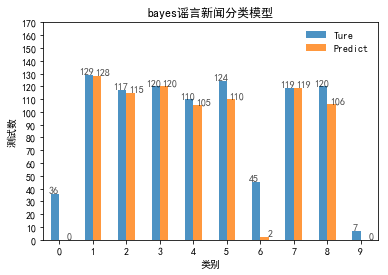

[0, 128, 115, 120, 105, 110, 2, 119, 106, 0]
[36, 129, 117, 120, 110, 124, 45, 119, 120, 7]


<Figure size 432x288 with 0 Axes>

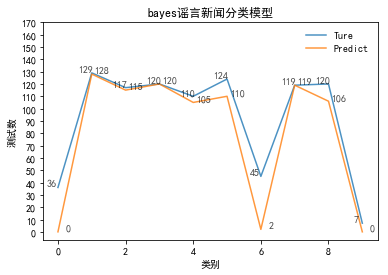

-------------决策树模型分类器结果-------------------
模型正确率为: 0.987055
             precision    recall  f1-score   support

          0    0.81818   1.00000   0.90000        36
          1    1.00000   1.00000   1.00000       129
          2    1.00000   1.00000   1.00000       117
          3    1.00000   0.99167   0.99582       120
          4    0.99091   0.99091   0.99091       110
          5    0.98413   1.00000   0.99200       124
          6    0.97619   0.91111   0.94253        45
          7    1.00000   1.00000   1.00000       119
          8    1.00000   0.95000   0.97436       120
          9    1.00000   1.00000   1.00000         7

avg / total    0.98858   0.98706   0.98732       927

[[ 36   0   0   0   0   0   0   0   0   0]
 [  0 129   0   0   0   0   0   0   0   0]
 [  0   0 117   0   0   0   0   0   0   0]
 [  1   0   0 119   0   0   0   0   0   0]
 [  1   0   0   0 109   0   0   0   0   0]
 [  0   0   0   0   0 124   0   0   0   0]
 [  2   0   0   0   0   2  41   0   0   0]


<Figure size 432x288 with 0 Axes>

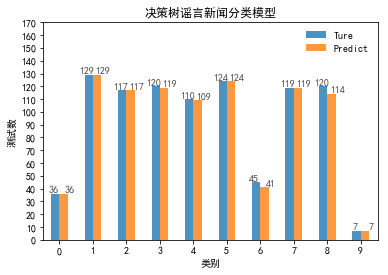

[36, 129, 117, 119, 109, 124, 41, 119, 114, 7]
[36, 129, 117, 120, 110, 124, 45, 119, 120, 7]


<Figure size 432x288 with 0 Axes>

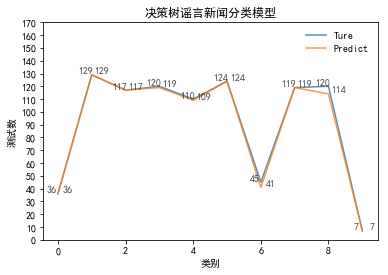

--------------knn分类模型结果------------------
模型正确率为: 0.480043
             precision    recall  f1-score   support

          0    1.00000   1.00000   1.00000        36
          1    0.99231   1.00000   0.99614       129
          2    0.20312   1.00000   0.33766       117
          3    0.00000   0.00000   0.00000       120
          4    0.84615   1.00000   0.91667       110
          5    1.00000   0.04032   0.07752       124
          6    0.66667   0.04444   0.08333        45
          7    1.00000   0.24370   0.39189       119
          8    1.00000   0.13333   0.23529       120
          9    1.00000   0.14286   0.25000         7

avg / total    0.73447   0.48004   0.42592       927

[[ 36   0   0   0   0   0   0   0   0   0]
 [  0 129   0   0   0   0   0   0   0   0]
 [  0   0 117   0   0   0   0   0   0   0]
 [  0   0 119   0   1   0   0   0   0   0]
 [  0   0   0   0 110   0   0   0   0   0]
 [  0   0 116   0   2   5   1   0   0   0]
 [  0   0  36   0   7   0   2   0   0   0]
 

<Figure size 432x288 with 0 Axes>

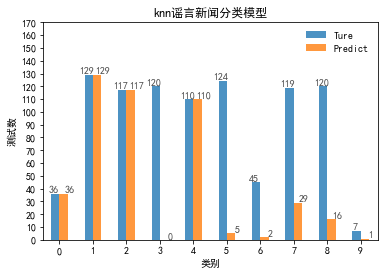

[36, 129, 117, 0, 110, 5, 2, 29, 16, 1]
[36, 129, 117, 120, 110, 124, 45, 119, 120, 7]


<Figure size 432x288 with 0 Axes>

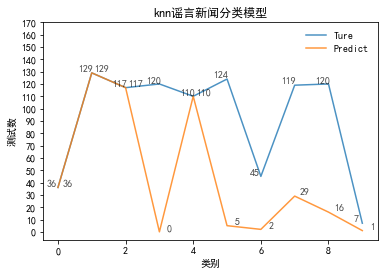

------------------svm支持向量机分类模型结果------------
模型正确率为: 0.984898
             precision    recall  f1-score   support

          0    0.81818   1.00000   0.90000        36
          1    1.00000   1.00000   1.00000       129
          2    1.00000   1.00000   1.00000       117
          3    1.00000   0.99167   0.99582       120
          4    1.00000   0.99091   0.99543       110
          5    0.98413   1.00000   0.99200       124
          6    1.00000   0.82222   0.90244        45
          7    1.00000   1.00000   1.00000       119
          8    0.96667   0.96667   0.96667       120
          9    1.00000   1.00000   1.00000         7

avg / total    0.98650   0.98490   0.98491       927

[[ 36   0   0   0   0   0   0   0   0   0]
 [  0 129   0   0   0   0   0   0   0   0]
 [  0   0 117   0   0   0   0   0   0   0]
 [  1   0   0 119   0   0   0   0   0   0]
 [  1   0   0   0 109   0   0   0   0   0]
 [  0   0   0   0   0 124   0   0   0   0]
 [  2   0   0   0   0   2  37   0   4   0

<Figure size 432x288 with 0 Axes>

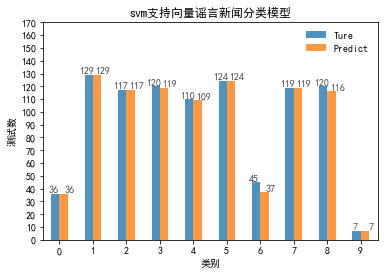

[36, 129, 117, 119, 109, 124, 37, 119, 116, 7]
[36, 129, 117, 120, 110, 124, 45, 119, 120, 7]


<Figure size 432x288 with 0 Axes>

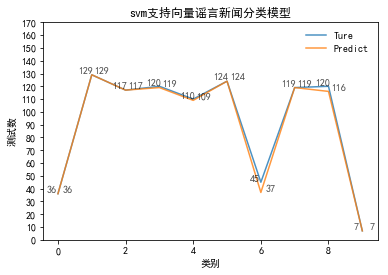

------------------svm支持向量机分类模型ROC曲线------------


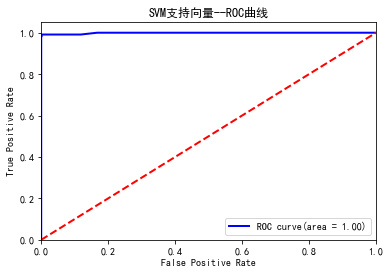

单个测试数据的维度为：58
训练数据的维度为：78048 
增加维度后的稀疏矩阵的维度为: 78048
类别为：2
该新闻的类别为: food


In [117]:
import numpy as np
from numpy import *
from sklearn.datasets import load_files
from sklearn.cross_validation import train_test_split#引入交叉验证函数
from sklearn.feature_extraction.text import TfidfVectorizer# 导入文本特征值得求解库 ，对文本的数据进行处理都是要使用到这个库的
from sklearn.metrics import precision_recall_fscore_support #结果分析库
from sklearn.metrics import accuracy_score
from sklearn import metrics #分类结果分析库
def get_stop_word():
    stop = open('e:py/数据源/stop_words.txt','r',encoding = 'utf-8').read()
    stop_word = stop.split(u'\n')
    return stop_word

def get_transform_data(stop_word):
    #导入数据
    data = load_files('e:/py/数据源/谣言新闻',encoding = 'utf-8')#利用load_files方法读取谣言新闻父文件下面所有子文件夹的所有文本内容。指定编码utf-8

    # # 数据归一化
    # from sklearn.preprocessing import StandardScaler
    # st = StandardScaler()
    # #对划分好的数据进行归一化
    # new_data= st.fit_transform(data)
    # print(new_data)
#     print(data.data[2])

    #划分训练和和测试数据，训练70%,测试30%
    #交叉分类：训练数据、测试数据、训练数据、测试数据
    text_train,text_test,y_train,y_test = train_test_split(data.data,data.target,test_size = 0.3)
    # BOOL型特征下的向量空间模型，注意，测试样本调用的是transform接口
    #创建对象，记住！对于文本型的数据的处理就要使用到Tfidf这个库来处理，其他处理都不够这个好
    text_vec = TfidfVectorizer(binary=False,decode_error='ignore',stop_words = stop_word)
    #获取特征值,使用fit_transform()方法将数据归一化，标准化
    # x_train = text_vec.fit_transform(text_train)#将text_train训练数据转为特征值数组形式
    # y_train = text_vec.fit_transform(y_train)
    # y_test = text_vec.fit_transform(y_test)
    x_test = text_vec.fit_transform(text_test)#将数据压缩，并转为稀疏矩阵的形式
    # print(np.linalg.eigvals(x_test))
    # print(len(x_test)) #x_test的长度远比x的长度要小，因为使用fit_transform压缩了
    # x_test = text_vec.transform(text_test) 

    # fit_transform() = fit()+transform(),故使用了fit_transform()
    x = text_vec.transform(data.data)#将所有数据转为特征向量 ,要是使用fit_transform方法的话，如果在使用fit(x,y)的方法后就是转化了两次，这样就
    #会在使用predict的时候报错，因为转化了两次了，特征值会变小很多
    y = data.target#获取数据的类别标签
    # print(x_train.toarray())
    # print(text_vec.get_feature_names())
    # print(data.data)
    # print(data.target)
    return x,y,y_test,x_test

#贝叶斯分类
def bayes(x,y,y_test,x_test):
# 创建bayes对象
    from sklearn.naive_bayes import BernoulliNB #导入bayes模型
#     from sklearn import metrics #结果报告
    bayes_model = BernoulliNB()
    bayes_model.fit(x,y)
    # print(model1)
    #测试
    expected = y_test#测试数据
    # print(x_test.shape[0:])
    # print(x_test.shape)
    # print()
    # print(model1.n_features)
    # a = list(x_test.shape)[0]*list(x_test.shape)[1]
    # c,b = x_test.shape
    # print(c)
    # print(x_test.shape[1])
    x_shape = x_test
    predicted = bayes_model.predict(x_shape)#预测数据
    #输出结果
    ture_rate = accuracy_score(y_test,predicted)
    print('模型正确率为: %f' % ture_rate)
    labels = set(y)
    print(metrics.classification_report(expected,predicted)) #输出分类结果
    matrix_info = metrics.confusion_matrix(expected,predicted) #获取混淆矩阵
    print(matrix_info)#输出混淆矩阵
    print('共'+str(len(list(labels)))+'类')
    p,r,f1,s = precision_recall_fscore_support(expected,predicted)
    return matrix_info,s,labels

#knn分类
def knn(x,y,y_test,x_test):
#     from sklearn import metrics
    from sklearn.neighbors import KNeighborsClassifier
    knn_model = KNeighborsClassifier(n_neighbors = 3)#设定3个临近点为一个类
    knn_model.fit(x,y)
    expected = y_test
#     x_shape = x_test
    predicted = knn_model.predict(x_test)
    ture_rate = accuracy_score(y_test,predicted)
    print('模型正确率为: %f' % ture_rate)
    labels = set(y)
    print(metrics.classification_report(expected,predicted,digits=5))
    matrix_info = metrics.confusion_matrix(expected,predicted)
    print(matrix_info)
    print('共'+str(len(list(labels)))+'类')
    p,r,f1,s = precision_recall_fscore_support(expected,predicted)
    return matrix_info,s,labels
    
    
#决策树分类
def decis_tree(x,y,y_test,x_test):
#     from sklearn import metrics
    from sklearn import tree
    tree_model = tree.DecisionTreeClassifier(criterion = 'gini')
    tree_model = tree.DecisionTreeClassifier(criterion = 'entropy') #为模型设置两个初始参数
    tree_model.fit(x,y)
    expected = y_test
    predicted = tree_model.predict(x_test)
    ture_rate = accuracy_score(y_test,predicted)
    print('模型正确率为: %f' % ture_rate)
    labels = set(y)
    print(metrics.classification_report(expected,predicted,digits=5))
    matrix_info = metrics.confusion_matrix(expected,predicted)
    print(matrix_info)
    print('共'+str(len(list(labels)))+'类')
    p,r,f1,s = precision_recall_fscore_support(expected,predicted)
    return matrix_info,s,labels
    
#svm支持向量机分类
# SVM既可以用来多类分类，就是SVC；又可以用来预测，或者成为回归，就是SVR。sklearn中的svm模块中也集成了SVR类。

def svm(x,y,y_test,x_test):
#     from sklearn import metrics
    from sklearn import svm
    from sklearn.multiclass import OneVsRestClassifier
    svm_model = svm.SVC(kernel = 'rbf',degree = 2,gamma = 1.7)
    svm_model.fit(x,y)
    expected = y_test
    predicted = svm_model.predict(x_test)
    ture_rate = accuracy_score(y_test,predicted)
    print('模型正确率为: %f' % ture_rate)
    print(metrics.classification_report(expected,predicted,digits=5))
    labels = set(y)
    matrix_info = metrics.confusion_matrix(expected,predicted)
    print(matrix_info)
#     print(matrix_info[0][0]) #输出第一类的预测正确个数
    print('共'+str(len(list(labels)))+'类')
    p,r,f1,s = precision_recall_fscore_support(expected,predicted)
#     print(s)
    return svm_model,matrix_info,s,labels #返回模型对象
#     feature_weight = svm_model.feature_importances_ #获取模型数据的特征向量的权重
#     print(feature_weight)

def draw_model(model_name,matrix_info,s,labels,kind,savepath):
    import pandas as pd
    import matplotlib.pyplot as plt
#     print(matrix_info)
    
    ture_data = list(s)
    predict = []
    for i in range(0,len(labels)):
        for j in range(0,len(labels)):
            if i ==j:
                predict.append(matrix_info[i][j])
    print(predict)
    print(ture_data)
    d={
        'Predict':predict,
        'Ture':ture_data
    }
    df = pd.DataFrame(d,
        # 定义数据显示的顺序
        columns=['Ture','Predict'],
        index=list(labels))
    plt.figure()
    df.plot(kind =kind,alpha = 0.8,rot = 0)
#     df.plot()
#     df.plot(kind = 'line',alpha = 0.5,rot = 0)#画折线图
#     x2.plot(kind = 'bar',color = 'red',stacked=True)
    plt.legend(df.columns,loc = 'upper right',frameon = False)  #设置标签注释在右边中间位置显示
    plt.title(model_name+'谣言新闻分类模型')
    plt.ylabel('测试数')
    plt.xlabel('类别')
    plt.yticks([y for y in range(0,180,10)])#设置y轴刻度
    for i in range(0,len(list(labels))):
    #给柱子加文字是使用text方法
    #plt.text()
   #  第一个参数是x轴坐标，第二个参数是y轴坐标，第三个参数是要显式的内容， alpha 设置字体的透明度，family 设置字体， size 设置字体的大小
   # style 设置字体的风格
   # wight 字体的粗细
   # bbox 给字体添加框，alpha 设置框体的透明度， facecolor 设置框体的颜色
        plt.text(i-0.18,df.get("Ture")[i],'%.0f'%df.get("Ture")[i], ha='center', va='bottom',alpha = 0.7)
        plt.text(i+0.3,df.get("Predict")[i],'%.0f'%df.get("Predict")[i], ha='center', va='bottom',alpha=0.7)
    plt.savefig(savepath,dpi = 150)
    plt.show()


#svm结合ROC曲线例子
#画ROC曲线
# （1）ROC曲线其实是诊断试验中用于展示某个判断原则效果好差的一种图形，可以通过AUC[0,1]来衡量大小。
# （2）给定最佳阈值后，可以通过灵敏度、特异度、正确率来评价判断的具体效果。

# 如果横轴是1-特异度，纵轴是灵敏度。那么就会形成1个弯曲的曲线。
# 这个曲线和45度的直线会形成一个曲线下面积(area under ROC)，简称AUC。AUC越大，说明判断的效果越好。
# 如图所示，AUC为0.9758，说明判断效果优秀了！
# 但是，实际工作中，一般AUC在0.7-0.9范围内的比较常见。超过0.9的属于凤毛麟角了。
# 当然，如果你对自己的分析结果不满意的话，可以求助专业的统计师哦。 
# def svm_and_ROC(x,y,y_test,x_test,savepath):
#     from sklearn import metrics
#     from sklearn.metrics import roc_curve,auc
#     import matplotlib.pyplot as plt
#     from sklearn import svm
#     from sklearn.multiclass import OneVsRestClassifier
#     from sklearn.model_selection import train_test_split
#     from sklearn.preprocessing import label_binarize
#     # ROC图的绘画
#     classes = [ i for i in range(len(list(set(y))))]
# #     classes = [0,1,2,3,4,5,6,7,8,9]
#     y = label_binarize(y,classes = classes)
#     n_classes = y.shape[1]
#     n_sample,n_features = x_test.shape#获取测试数据的shape值行列值
#     #y二值后，对数据重新分类
#     X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
#     svm_model2 = OneVsRestClassifier(svm.SVC(kernel = 'rbf',degree = 2,gamma = 1.7)) #这里命名为svm_model2防止与上面的svm()函数依赖的svm_model重名
#     y_score = svm_model2.fit(x,y).decision_function(X_test)
#     #计算每个类别的roc值
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()
#     #遍历类别
#     for i in range(n_classes):
#         fpr[i],tpr[i],_ = roc_curve(y_test[:,i],y_score[:,i])
#         roc_auc[i] = auc(fpr[i],tpr[i])
    
#     fpr['micro'],tpr['micro'],_ = roc_curve(y_test.ravel(),y_score.ravel())
#     roc_auc['micro'] = auc(fpr['micro'],tpr['micro'])
#     #画图
#     plt.figure()
#     lw = 2
#     plt.plot(fpr[2],tpr[2],color = 'b',lw = lw,label = 'ROC curve(area = %0.2f)' % roc_auc[2])
#     plt.plot([0,1],[0,1],color = 'red',lw = lw,linestyle='--')
#     plt.xlim([0.0,1.0])
#     plt.ylim([0.0,1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC')
#     plt.legend(loc = 'lower right')
#     plt.savefig(savepath,dpi = 150)
#     plt.show()
    
#函数封装画图方法 ，只能画svm的模型ROC  
def draw_ROC(x,y,y_test,x_test,model_type,savepath):
#     from sklearn import metrics
    from sklearn.metrics import roc_curve,auc
    import matplotlib.pyplot as plt
    from sklearn import svm
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import label_binarize
    # ROC图的绘画
    classes = [ i for i in range(len(list(set(y))))]
#     classes = [0,1,2,3,4,5,6,7,8,9]
    y = label_binarize(y,classes = classes)
    n_classes = y.shape[1]
    n_sample,n_features = x_test.shape#获取测试数据的shape值行列值
    #y二值后，对数据重新分类，测试数据取30%
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    model2 = OneVsRestClassifier(model_type) #这里命名为svm_model2防止与上面的svm()函数依赖的svm_model重名
    y_score = model2.fit(x,y).decision_function(X_test)
    #计算每个类别的roc值
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    #遍历类别
    for i in range(n_classes):
        fpr[i],tpr[i],_ = roc_curve(y_test[:,i],y_score[:,i])
        roc_auc[i] = auc(fpr[i],tpr[i])
    #计算auc
    fpr['micro'],tpr['micro'],_ = roc_curve(y_test.ravel(),y_score.ravel())
    roc_auc['micro'] = auc(fpr['micro'],tpr['micro'])
    #画图
    plt.figure()
    lw = 2
    plt.plot(fpr[2],tpr[2],color = 'b',lw = lw,label = 'ROC curve(area = %0.2f)' % roc_auc[2])
    plt.plot([0,1],[0,1],color = 'red',lw = lw,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('SVM支持向量--ROC曲线')
    plt.legend(loc = 'lower right')
    plt.savefig(savepath,dpi = 150)
    plt.show()
    
    
# 这个是无监督学习的，就是事先没有进行训练就可以直接对数据集x_test进行分类的算法，上面的需要fit()的都是监督学习的算法
def k_means(x_test,y_test):
    #导入sklearn中导入kmeans模型
    from sklearn.cluster import Birch
    from sklearn.cluster import KMeans  #导入kmeans模型
    #创建模型对象 参数 n_clusters = '要分成的类别数'   , n_jobs = 2,模型开启的表示线程数为2，max_iter = '模型循环验证的次数'
    kms_model = KMeans(n_clusters = 3,n_jobs = 3,max_iter = 200)
    predicted = kms_model.fit_predict(x_test)
    print(x_test.shape)
    print(len(predicted))
    expected = y_test
    print(metrics.classification_report(expected,predicted))
    print(metrics.confusion_matrix(expected,predicted))
    print('共'+str(len(predicted))+'类') 

    
def single_transform(x,x_test1):
    from sklearn.feature_extraction.text import CountVectorizer
    from collections import Counter
    import numpy as np
    from scipy.sparse import coo_matrix
    #将稀疏矩阵形式的x_test1转为一般数组，使用toarray()方法
    new_array = x_test1.toarray()
    # print(new_array)
    #构造x_test1要转成的维度数组
    b = np.zeros((1,x.shape[1]))
    # 输出构造的数组的维度数
#     print(b.shape[1])
    # e = np.array([[1,2,8]])
    # t = np.array([[0,0,0,0]])
    # for i in range(0,len(e[0])):
    #     print(e[0][i])
    #     t[0][i] = e[0][i]
    # print(t)
    #利用循环，把new_array中的数值转为维度为10000的数组矩阵b
    for j in range(0,len(new_array[0])):
        b[0][j] = new_array[0][j]
    #输出转为10000维度的new_array数组
#     print(b)
    #新数组的维度
#     print(b.shape[1])
    final_data = coo_matrix(b) #利用coo_matrix()将一般数组b转为稀疏矩阵
#     print(final_data.shape)
    #输出维度变为10000维度的x_test1的特征数
    print('增加维度后的稀疏矩阵的维度为: %s' %final_data.shape[1])
    return final_data



#单个测试数据，实现中。。。。
def singel_predict_svm(x,y,stop_word,fname):
    from sklearn.preprocessing import StandardScaler
    from sklearn.feature_extraction.text import CountVectorizer
    import io
    import numpy as np
    from sklearn import metrics
    from sklearn import svm
    from sklearn.multiclass import OneVsRestClassifier
    #     print(X_test)
#     from sklearn.preprocessing import  
    #读取单个数据
#     data2 = load_files('e:/py/health',encoding = 'utf-8')
#     print(data2)
    file_name = fname
    data1 = open(file_name,'r',encoding = 'utf-8').read()
#     print([data1])
    data2 = np.array([data1])
    #文本数据转换提取特征值方法一
    text_vec = CountVectorizer(stop_words = stop_word)
    x_test1 =text_vec.fit_transform(data2)#data2必须为np.array的二维数组
#     print(x_test1.shape)  
#   #文本数据转换提取特征值方法二
#     text_vec = TfidfVectorizer(binary=False,decode_error='ignore',stop_words = stop_word)
    #获取特征值,使用fit_transform()方法将数据归一化，标准化
#     x_test1 = text_vec.fit_transform(data2)#将数据压缩，并转为稀疏矩阵的形式,data2必须为np.array二维数组
#     print(x_test.shape)
    
    svm_model = svm.SVC(kernel = 'rbf',degree = 2,gamma = 1.7)
    svm_model.fit(x,y) 
    print('单个测试数据的维度为：%s' % x_test1.shape[1]) #测试数据的维度数
    print('训练数据的维度为：%s ' %x.shape[1])#训练数据的维度数，
    #测试数据的特征维度数一定要与训练数据的特征维度数相等才可以
    #将测试数据的维度数转为与训练数据的维度数相等的维度
    x_test2 = single_transform(x,x_test1)
    predicted = svm_model.predict(x_test2)

#     print(metrics.classification_report(expected,predicted))
#     labels = set(y)
#     print(metrics.confusion_matrix(expected,predicted))
#     print('共'+str(len(list(labels)))+'类') 
#     print(predicted)
#     print('类别对应数字为：')
#     print('0:baby,1:car,2:food,3:health,4:legend,5:life,6:love,7:news,8:science,9:sexual')
#     print('预测该新闻类别是：%s' % predicted[0])
    return predicted[0]
def judge_type(num):
    a = {
        0:'baby',1:'car',2:'food',3:'health',4:'legend',5:'life',6:'love',7:'news',8:'science',9:'sexual'
    }
    for i in range(0,len(list(a.keys()))):
        if num == list(a.keys())[i]:
#             print(list(a.keys())[i])
            print('预测该新闻的类别为: %s' %list(a.values())[i])
    
    
if __name__=='__main__':
    stop_word = get_stop_word()
    x,y,y_test,x_test= get_transform_data(stop_word)
    print('------------bayes模型分类器结果----------------')
    g,h,l= bayes(x,y,y_test,x_test)
    draw_model('bayes',g,h,l,'bar','e:py/数据源/bayes_pic.png')
    draw_model('bayes',g,h,l,'line','e:py/数据源/bayes_line_pic.png')
    print('-------------决策树模型分类器结果-------------------')
    a,b,c = decis_tree(x,y,y_test,x_test)
    draw_model('决策树',a,b,c,'bar','e:py/数据源/tree_pic.png')
    draw_model('决策树',a,b,c,'line','e:py/数据源/tree_line_pic.png')
    print('--------------knn分类模型结果------------------')
    d,e,f = knn(x,y,y_test,x_test)
    draw_model('knn',d,e,f,'bar','e:py/数据源/knn_pic.png')
    draw_model('knn',d,e,f,'line','e:py/数据源/knn_line_pic.png')
    print('------------------svm支持向量机分类模型结果------------')
    svm,matrix_info,s,labels = svm(x,y,y_test,x_test)
    draw_model('svm支持向量',matrix_info,s,labels,'bar','e:py/数据源/svm_pic.png')
    draw_model('svm支持向量',matrix_info,s,labels,'line','e:py/数据源/svm_line_pic.png')
    print('------------------svm支持向量机分类模型ROC曲线------------')
    draw_ROC(x,y,y_test,x_test,svm,'e:py/数据源/svm_ROC.png')
#     svm_and_ROC(x,y,y_test,x_test,'e:py/数据源/ROC.png')
#     ROC(y,y_score,'e:py/数据源/ROC.png')
#     print('--------------非监督学习聚类算法K-Means------------')
#     k_means(x_test,y_test)
#     print(x.shape)
#     print(x_test.shape[1])
#     num = singel_predict_svm(x,y,stop_word,'e:/py/数据源/谣言新闻/food/1.txt')
    num = singel_predict_svm(x,y,stop_word,'e:/py/数据源/谣言新闻/health/1.txt')
    print('类别为：%s' %num)
    judge_type(num)


In [80]:
a = {'1':'a','2':'b','3':'c'}
list(a.keys())[0]
list(a.values())[0]
for i in range(0,len(list(a.keys()))):
    if '1' == list(a.keys())[i]:
        print(list(a.values())[i])

a


#  一般数组与稀疏矩阵的转换，以及数据维度的增加, 把原来数据的特征维度增加，

# 用 0 代替没用值得数据，然后再转为稀疏矩阵

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
# from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import numpy as np
from numpy import *
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix
from scipy import sparse
import scipy
#数据转换方法一
file_name = 'e:/py/谣言新闻/health/4.txt'
data1 = open(file_name,'r',encoding = 'utf-8').read()
data = np.array([data1])
# print(data)
text_vec = CountVectorizer(stop_words = stop_word)
x_test1 =text_vec.fit_transform(data)#data2必须为二维数组,返回的是稀疏矩阵
print('---------------方法一获取的文本数据的维度')
print(x_test1.shape[1])

#文本数据转换方法二
text_vec = TfidfVectorizer(binary=False,decode_error='ignore',stop_words = stop_word)
#获取特征值,使用fit_transform()方法将数据归一化，标准化
# x_train = text_vec.fit_transform(text_train)#将text_train训练数据转为特征值数组形式
# y_train = text_vec.fit_transform(y_train)
# y_test = text_vec.fit_transform(y_test)
x_test = text_vec.fit_transform(data)#将数据压缩，并转为稀疏矩阵的形式
print('-----------方法二获取的文本数据维度')
print(x_test.shape[1])
#利用toarray()将稀疏矩阵转为一般数列
new_array = x_test1.toarray()
# print(new_array)
#构造x_test1要转成的维度数组
b = np.zeros((1,10000))
# 输出构造的数组的维度数
print(b.shape[1])
# e = np.array([[1,2,8]])
# t = np.array([[0,0,0,0]])
# for i in range(0,len(e[0])):
#     print(e[0][i])
#     t[0][i] = e[0][i]
# print(t)
#利用循环，把new_array中的数值转为维度为10000的数组矩阵b
for j in range(0,len(new_array[0])):
    b[0][j] = new_array[0][j]
#输出转为10000维度的new_array数组
# print(b)
#新数组的维度
print(b.shape[1])
g = coo_matrix(b) #利用coo_matrix()将一般数组b转为稀疏矩阵
print(g)
#输出维度变为10000维度的x_test1的特征数
print(g.shape[1])

---------------方法一获取的文本数据的维度
99
-----------方法二获取的文本数据维度
99
10000
10000
  (0, 0)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 7)	1.0
  (0, 8)	1.0
  (0, 9)	1.0
  (0, 10)	1.0
  (0, 11)	1.0
  (0, 12)	1.0
  (0, 13)	1.0
  (0, 14)	1.0
  (0, 15)	1.0
  (0, 16)	1.0
  (0, 17)	1.0
  (0, 18)	1.0
  (0, 19)	1.0
  (0, 20)	1.0
  (0, 21)	1.0
  (0, 22)	1.0
  (0, 23)	1.0
  (0, 24)	1.0
  :	:
  (0, 74)	1.0
  (0, 75)	1.0
  (0, 76)	1.0
  (0, 77)	1.0
  (0, 78)	1.0
  (0, 79)	1.0
  (0, 80)	1.0
  (0, 81)	1.0
  (0, 82)	1.0
  (0, 83)	1.0
  (0, 84)	1.0
  (0, 85)	1.0
  (0, 86)	1.0
  (0, 87)	1.0
  (0, 88)	1.0
  (0, 89)	1.0
  (0, 90)	1.0
  (0, 91)	1.0
  (0, 92)	1.0
  (0, 93)	1.0
  (0, 94)	1.0
  (0, 95)	1.0
  (0, 96)	1.0
  (0, 97)	1.0
  (0, 98)	1.0
10000


In [4]:
import numpy  as np
z = np.array([[1, 2, 3, 4],[5, 6, 7, 8],[9, 10, 11, 12]])
a = list(z.shape)[0]*list(z.shape)[1]
q=len(list(z.reshape(-1,1)))+2
print(a)

12
